Projet 3
========

TP3 séance 2-3
========
--------
Ricardo

Safwane

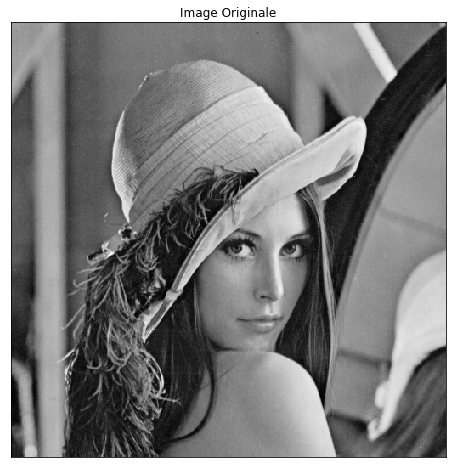

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy

%matplotlib inline 

lena = cv2.imread('lena.png',0)

(lignes, colonnes) = lena.shape 

#Affichage de l'image originale
plt.figure(1,figsize=(8,8))
plt.imshow(lena, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('Image Originale')
plt.show() 

 1) Pour réduire significativement la taille de l’image, quelles sont à votre avis les informations d’une image qui pourraient être éliminées sans trop dégrader le contenu de l’image.

Pour réduire la taille d'une image on peut éliminer les détails de l'image. Ces détails correspondent aux hautes fréquences. Il nous faut donc un outil qui nous permettra de réduire les hautes fréquences.

2) Quelle outil mathématique permettrait d’accéder au contenu que vous avez identifié
à la question précédente ? Programmer l’outil mathématique identifié et étudier ses
propriétés de base.

Pour accéder et réduire les hautes fréquences, nous allons utiliser la DCT (Discrete Cosine Transform). La DCT nous permettra de passer à l'étape de quantification puis de codage.

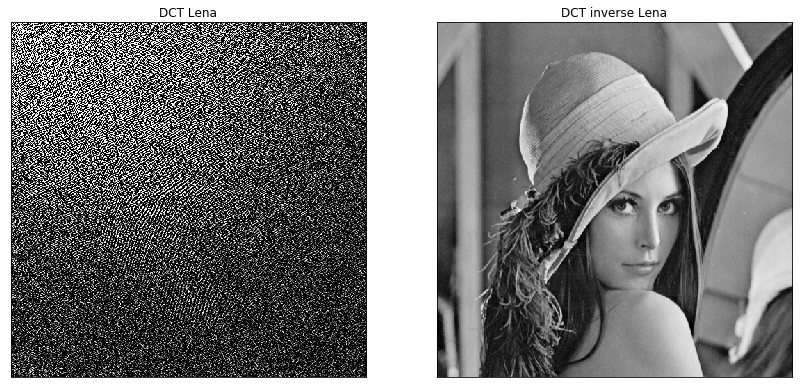

In [2]:
# Programmation de la DCT

from scipy.fftpack import dct
from scipy.fftpack import idct

# On applique la DCT 1D qui est présente dans scipy.fftpack sur les 2 axes
# pour avoir une DCT 2D
def dct2(img):
    return dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')

# On applique la DCT inverse 1D qui est présente dans scipy.fftpack sur 
# les 2 axes pour avoir une DCT inverse 2D
def idct2(img):
    return idct(idct(img, axis=0, norm='ortho'), axis=1, norm='ortho')

dct2_lena = dct2(lena)

plt.figure(1,figsize = (14,14))
plt.subplot(121)
plt.imshow(dct2_lena, cmap = 'gray', vmax=np.max(dct2_lena)*0.0001,vmin =0)
plt.title("DCT Lena"), plt.xticks([]), plt.yticks([])

idct2_lena = idct2(dct2_lena)

plt.subplot(122)
plt.imshow(idct2_lena, cmap = 'gray')
plt.title("DCT inverse Lena"), plt.xticks([]), plt.yticks([])

plt.show()
    

D'après le cours, la DCT va nous permettre de travailler directement sur l'intensité des pixels.
De plus la DCT permet de compacter l'énergie et ainsi d'avoir des indormations contenues dans moins de coefficients.
Dernier point important, on utilise la DCT plutôt que la FFT car la DCT produit seulement des réels, cela est donc plus rapide à calculer que la FFT.

3)Est-il préférable de travailler avec des blocs de pixels (de taille 8x8 par exemple) ou
bien sur une image entière ? Appliquer l’outil mathématique identifié à la question précédente sur des blocs de pixels 8x8.

Si on travaille sur des blocs 8x8, le calcul de la DCT sera plus rapide et donc plus efficace. En effet au lieu de faire 512x512 fois le calcul de la DCT, on fera 8x8 fois le calcul de la DCT sur les 512/8 blocs. Donc on passe de 262144 (512x512) à 4096 (8x8x512/8) calculs de DCT. Cependant si on ne prend pas en compte l'image entière, on perd de l'information si on veut rassembler les blocs. C'est d'ailleurs pour cela que les images JPEG présentent des petits carrés.

Dans tout les cas on cherche à compresser l'image donc à perdre de l'information. Mais dans le premier cas on risque d'en perdre beaucoup.

Finalement il y a un compromis à avoir entre rapidité du calcul et qualité de l'image.

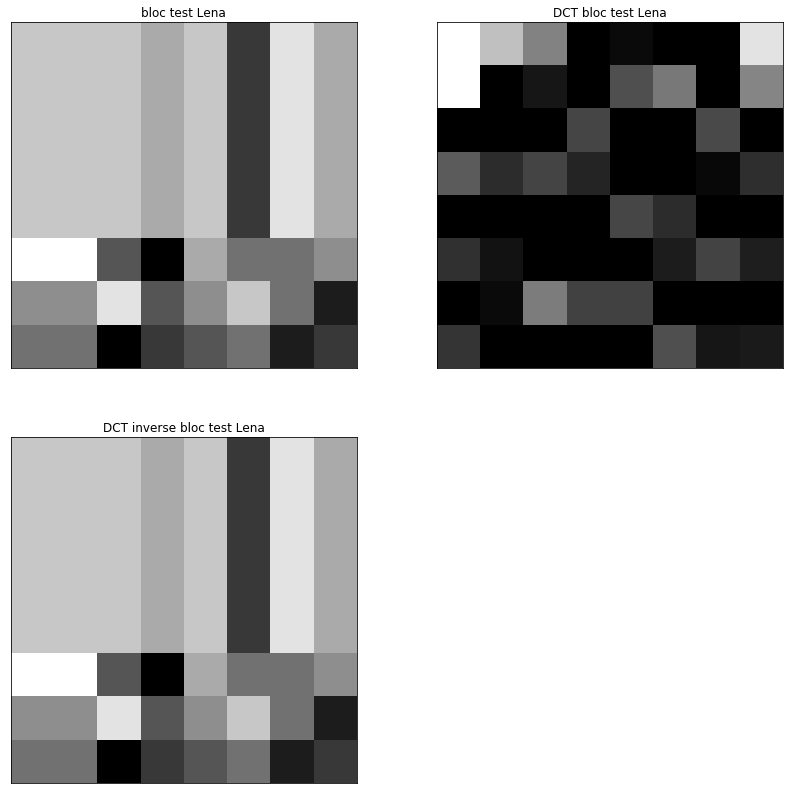

In [3]:
# un bloc est 8x8 donc on a 512/8 * 512/8 blocs différents

# La fonction creerBloc renvoie un bloc de taille 8x8
def creerBloc(img,i,j): # i et j appartiennent à [0;64] (512/8=64)
    i=i*8 
    j=j*8 
    k=0
    l=0
    bloc=np.zeros((8,8)) 
    for m in range (i,i+8):
        for n in range(j,j+8):
            bloc[k,l]=img[m,n]
            l=l+1
        k=k+1
        l=0
    return bloc

# on test pour un bloc, ici le premier bloc en haut à gauche
bloc_test = creerBloc(lena,0,0)
dct2_bloc_test = dct2(bloc_test)
idct2_bloc_test = idct2(dct2_bloc_test) 

plt.figure(2,figsize = (14,14))
plt.subplot(221)
plt.imshow(bloc_test, cmap = 'gray')
plt.title("bloc test Lena"), plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(dct2_bloc_test, cmap = 'gray', vmax=np.max(dct2_lena)*0.0001,vmin =0)
plt.title("DCT bloc test Lena"), plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.imshow(idct2_bloc_test, cmap = 'gray')
plt.title("DCT inverse bloc test Lena"), plt.xticks([]), plt.yticks([])

plt.show()

(Text(0.5,1,'DCT de tout les blocs'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

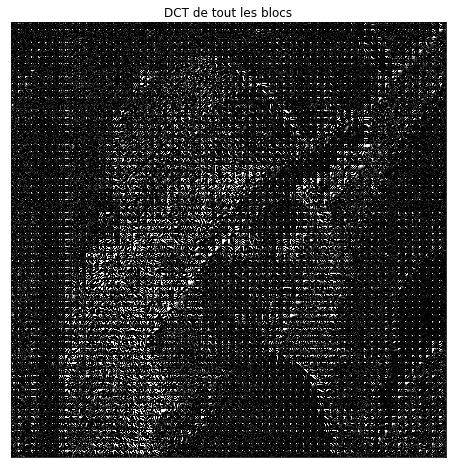

In [4]:


image_assemblee=np.zeros((lignes,colonnes))
def assemblageBloc(bloc,i,j):
    i=i*8
    j=j*8
    k=0
    l=0
    for m in range (i,i+8):
        for n in range(j,j+8):
            image_assemblee[m,n]=bloc[k,l]
            l=l+1
        k=k+1
        l=0
    return image_assemblee

# on crée un tableau de taille 512x512 qui aura tout les blocs
for i in range (lignes//8):
    for j in range (colonnes//8):
        lena_8=creerBloc(lena,i,j) # on crée tout les blocs
        dct2_total=assemblageBloc(dct2(lena_8),i,j) # dct de tout les blocs mis dans le même tableau
    
plt.figure(3,figsize = (8,8))
plt.imshow(dct2_total, cmap = 'gray', vmax=np.max(dct2_total)*0.01,vmin =0)
plt.title("DCT de tout les blocs"), plt.xticks([]), plt.yticks([])

4)Proposer une méthode efficace pour réduire l'information à conserver. Cette méthode
doit dépendre d'au moins un paramètre de réglage qui permet de maîtriser le niveau de
compression souhaité. Programmer la méthode proposée.


5) Dans la sèance 1, vous avez étudié des outils pour la compression sans perte. Dans les questions précédente , vous avez proposé une méthode de compression avec perte. Comment
pourrait-on conjuguer ces deux approches pour obtenir une forte compression. Programmer la méthode proposée.

6) Étudier l'efficacité de cette méthode en terme de compression et en terme de respect de
la qualité visuelle.